**Topic**: **Python Visualizations**

 In this notebook, we will explore the different libraries that help in visualizing data to get better insights.


In [ ]:
# importing lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# **DataSet**

**Scenario:**
You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

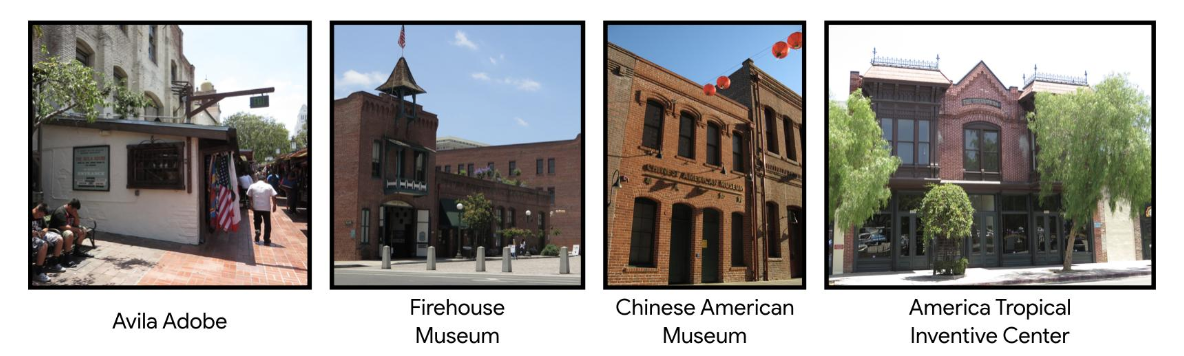

You will leverage data from the Los Angeles Data Portal that tracks monthly visitors to each museum.

[Resourse](https://www.kaggle.com/code/renadalhmadi/exercise-line-charts/edit)

In [ ]:
# Defining Data Path:
path = "/content/museum_visitors.csv"

# Reading the Dataset
rData = pd.read_csv(path, index_col = "Date" , parse_dates=True)
rData.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [ ]:
# the last 5 rows of the data to check last date compared to the first.
rData.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


In [ ]:
# EDA info method to undertsand Dtypes and columns:
rData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2014-01-01 to 2018-11-01
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Avila Adobe                           59 non-null     int64
 1   Firehouse Museum                      59 non-null     int64
 2   Chinese American Museum               59 non-null     int64
 3   America Tropical Interpretive Center  59 non-null     int64
dtypes: int64(4)
memory usage: 2.3 KB


In [ ]:
# EDA method for statistical describtion:
rData.describe()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
count,59.000000,59.000000,59.000000,59.000000
mean,24061.661017,6472.830508,2721.254237,7107.016949
std,5948.997414,7471.196609,1165.585196,2561.671286
min,14035.000000,3306.000000,1073.000000,2824.000000
25%,19469.500000,4412.500000,2134.000000,5424.500000
50%,23136.000000,5181.000000,2419.000000,6602.000000
75%,27502.000000,6239.500000,2942.500000,7943.000000
max,41242.000000,61192.000000,7702.000000,13490.000000


# Line Chart ▶

First, let's try to plot here the amount of  
visitors that come to museums every year.


**Matplotlib:**

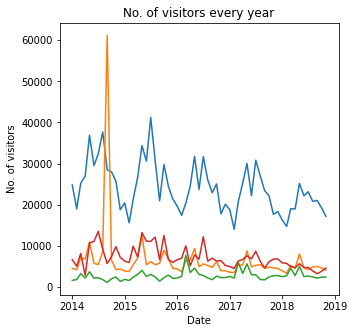

In [ ]:
# line chart
plt.figure(figsize=(5,5))
plt.plot(rData)
# add X-axis label
plt.xlabel("Date")
# add Y-axis label
plt.ylabel("No. of visitors")
plt.title("No. of visitors every year")
plt.show()

**Seaborn:**

[Text(0, 0.5, 'visitors'), Text(0.5, 0, 'Date')]

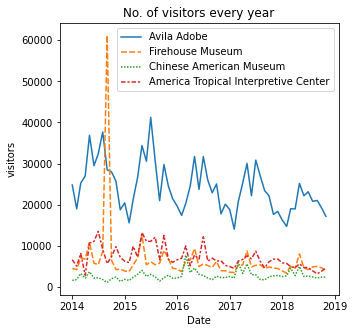

In [ ]:
# line chart
plt.figure(figsize=(5,5))
plt.title("No. of visitors every year")
fig = sns.lineplot(data=rData)
# add X-axis label & Y-axis label
fig.set(xlabel='Date', ylabel='visitors')

'''
Note: when it comes the number of visitors whecn can notice between the year 2014 - 2016
we had more visitors than next 3 years period.
'''

# Bar Chart ▶

First, let's try to plot here the top 2 museums when it comes to the number of visitors.

**note**:  *I used the funct I built in the previous assignment in order to get the top 2 columns.*  

In [ ]:
# func that return the top Five museums with the largest number of visitors
def top_cols_sum(df,ncols):
  sum = df.sum(numeric_only= True)
  largest = sum.sort_values(ascending=False, inplace=False).head(ncols)
  dic_of_sum = largest.to_dict()
  return dic_of_sum

dic = top_cols_sum(rData,4)

**Matplotlib:**

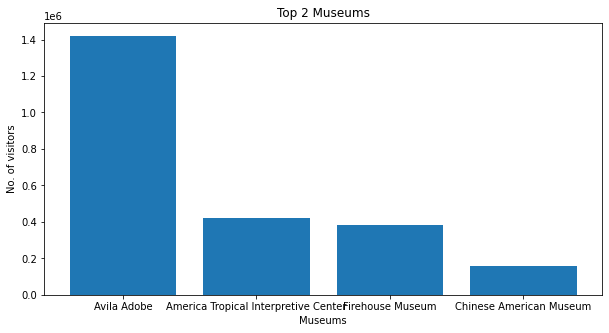

' \nNote: using the descibe() method we can confirm that "Avila Adobe" is the Top 1 \nand America Tropical Interpretive Center is Top 2\n'

In [ ]:
# plot the Bar chart
museum = list(dic.keys())
visitors = list(dic.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(museum, visitors)
plt.xlabel("Museums")
plt.ylabel("No. of visitors")
plt.title("Top 2 Museums")
plt.show()

'''
Note: using the descibe() method we can confirm that "Avila Adobe" is the Top 1
and America Tropical Interpretive Center is Top 2 when it comes the number of visitors.
'''

**Seaborn:**


' \nNote: using the descibe() method we can confirm that "Avila Adobe" is the Top 1 \nand America Tropical Interpretive Center is Top 2\n'

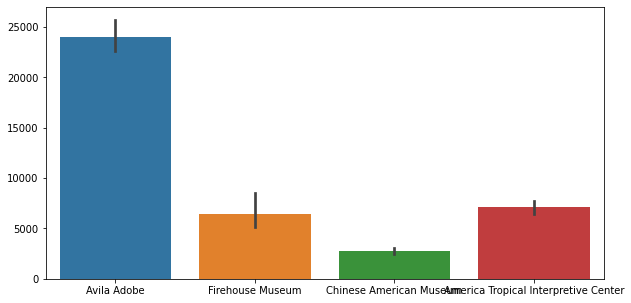

In [ ]:
# plot the Bar chart
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
sns.barplot(data=rData)

'''
Note: using the descibe() method we can confirm that "Avila Adobe" is the Top 1
and America Tropical Interpretive Center is Top 2
'''

# Scatter Plot  ▶

First, let's try to plot here the least visited museums along with months of visting to compare it with others museums.

**Matplotlib:**

In [ ]:
# Extract Month only from DateTime column in Pandas
Data = pd.read_csv(path)
Data['month'] = pd.to_datetime(Data['Date']).dt.month

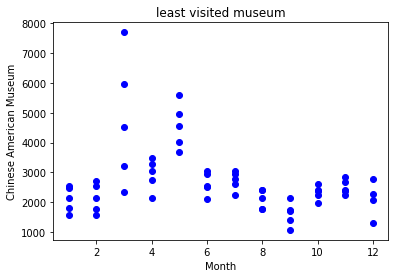

' \nNote: we can conduct more analysis here and try to fix the situation by inviting more\nvisitors each month to increase the number. \n'

In [ ]:
 # ploting the months + number of vitiors to the least visited museums
plt.scatter(Data['month'], rData['Chinese American Museum'], c ="blue")

# To show the plot
plt.xlabel("Month")
plt.ylabel("Chinese American Museum")
plt.title("least visited museum")
plt.show()

'''
Note: we can conduct more analysis here and try to fix the situation by inviting more
 visitors each month to increase the number.
'''

**Seaborn:**

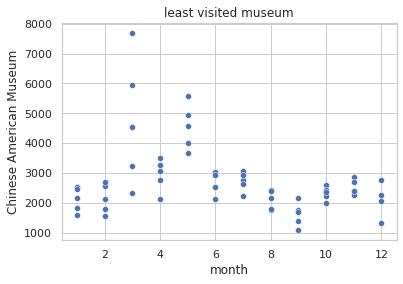

In [ ]:
# setting style
Data_month = Data[['month','Chinese American Museum']]
sns.set(style='whitegrid')
plt.title("least visited museum")

 # plotting
sns.scatterplot(x="month",
                    y="Chinese American Museum",
                    data=Data_month)

# Pie Chart  ▶

First, let's try to plot here the least visited museums along with months of visting to compare it with others museums.

**Matplotlib:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


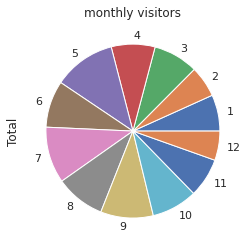

In [ ]:
# taking total number of visitors in each col
Data["Total"] = Data.sum(axis = 1)

# grouping data based on month
Data.set_index('month', inplace = True)
Data = Data.groupby('month', axis = 0).sum()
Data['Total'].plot(kind = "pie")
plt.title("monthly visitors")
plt.show()

**Seaborn:**

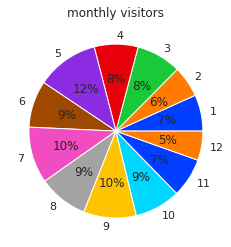

In [ ]:
# styleing
palette_color = sns.color_palette('bright')
plt.title("monthly visitors")

# plotting data on chart
plt.pie(Data['Total'], labels=month, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()
'''
Note: we can see that the most crowded month is 5 = May.
'''

**Matplotlib:**

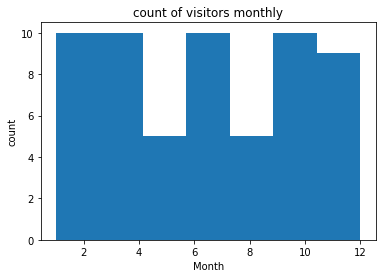

In [ ]:
# ploting the hist for the months
plt.hist(Data['month'], bins = 7)
plt.xlabel("Month")
plt.ylabel("count")
plt.title("count of visitors monthly")
plt.show()
plt.show()

**Seaborn:**

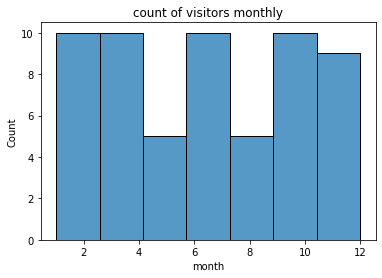

In [ ]:
# Histogram using seaborn
sns.histplot(Data["month"])
plt.title("count of visitors monthly");

**Matplotlib:**
it wasn't implemnting correctly..

**Seaborn:**

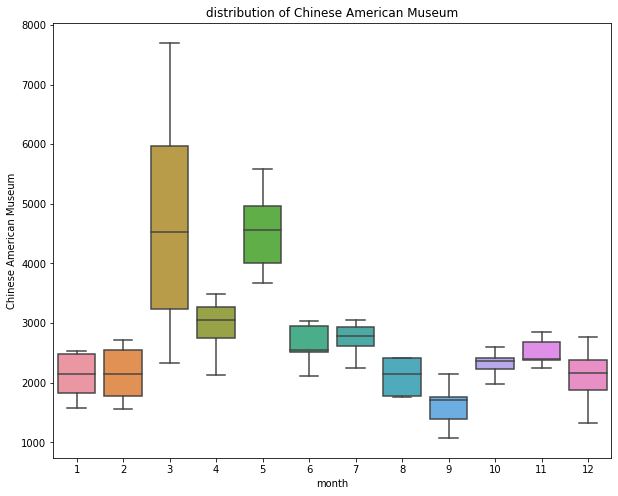

In [ ]:
# Chinese American Museum distribution over months
plt.figure(figsize=(10,8))
sns.boxplot(
    x="month",
    y="Chinese American Museum",
    data=Data
)
plt.title("distribution of Chinese American Museum");

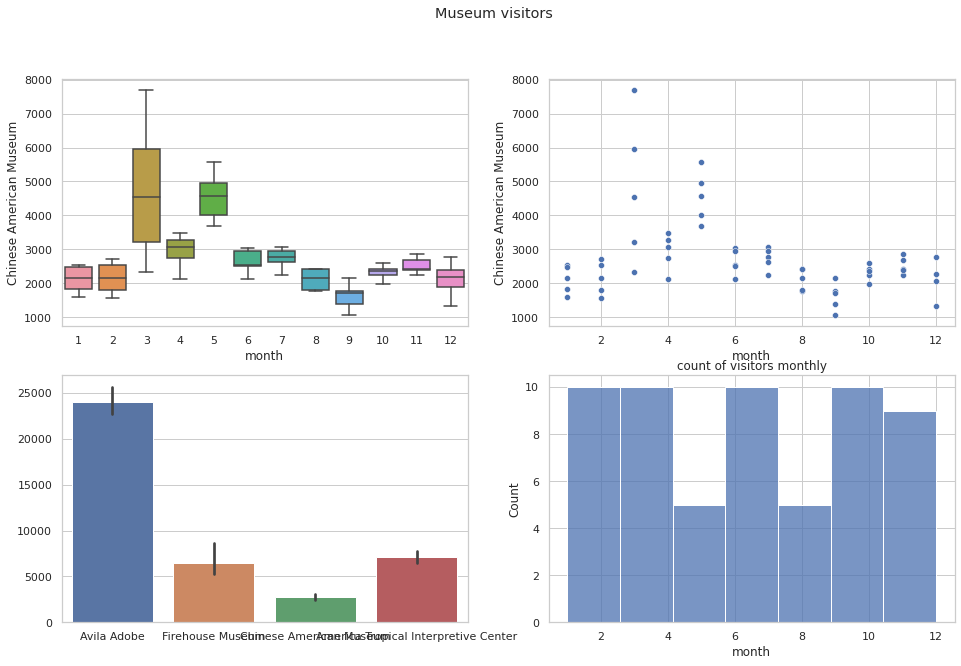

In [ ]:
# Dimensions of the figure
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# title
fig.suptitle('Museum visitors')

# boxplot
sns.boxplot(
    ax=axes[0, 0],
    x="month",
    y="Chinese American Museum",
    data=Data
)
# histo chart
sns.histplot(Data["month"])
plt.title("count of visitors monthly");

# scatterplot
sns.scatterplot(
    ax=axes[0, 1],
    x="month",
    y="Chinese American Museum",
    data=Data_month)

# barplot
sns.barplot(ax=axes[1, 0],data=rData)
